Creating a Single-Layer Neural Network for a quick refresher of Deep Learning uisng Pytorch Library

In [1]:
#Import the required library

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Creating a dummy input data(x) of random values and dummy target data (y) that only contains 0s and 1s. Store it in the data in PyTorch tensors. Tensors x will have a size of (100,5), while the size of y will be (100,1)

In [2]:
x = torch.randn(100,5)
y = torch.randint(0,2, (100,1)).type(torch.FloatTensor)

Next we will define the architecture of the model and store it ina variable named model.

In [4]:
model = nn.Sequential(nn.Linear(5,1),
                   nn.Sigmoid())

Now we will define the loss function to be used. We will use the Mean Square Error loss function.

In [5]:
loss_function = torch.nn.MSELoss()

We will define the optimizer of our model. We will be using the Adam optimizer  and a learning rate of 0.01

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

We will run the optimization for 100 iterations, and along with it, we will print and save the loss values

In [7]:
losses = []

for i in range(100):
  # Call to the model to perform a prediction
  y_pred = model(x)

  # Calculation of loss function based on y_pred and y
  loss = loss_function(y_pred, y)

  print(loss.item())


  losses.append(loss.item())

  #Zero the gradients so that previous ones don't accumulate
  optimizer.zero_grad()

  #Calculate the gradients of the loss function
  loss.backward()

  #Call to the optimizer to perform an update of the parameters
  optimizer.step()

0.28072789311408997
0.278934508562088
0.277182936668396
0.27547580003738403
0.27381545305252075
0.27220359444618225
0.2706412374973297
0.26912862062454224
0.26766523718833923
0.26625052094459534
0.264883816242218
0.26356425881385803
0.26229098439216614
0.26106253266334534
0.25987687706947327
0.25873178243637085
0.2576247453689575
0.25655317306518555
0.25551506876945496
0.2545087933540344
0.25353339314460754
0.2525884509086609
0.2516738474369049
0.25078973174095154
0.24993616342544556
0.2491130828857422
0.24832025170326233
0.2475573867559433
0.24682387709617615
0.24611927568912506
0.24544282257556915
0.2447938174009323
0.2441714107990265
0.24357452988624573
0.24300198256969452
0.2424524873495102
0.24192477762699127
0.24141749739646912
0.2409295290708542
0.24045979976654053
0.2400074452161789
0.23957152664661407
0.23915135860443115
0.23874624073505402
0.23835556209087372
0.2379787266254425
0.23761536180973053
0.23726506531238556
0.2369275689125061
0.23660263419151306
0.23628999292850494


We will print the values of the final weights and bias. There should be a total of five weights(one for each feature of the input data) and one bias value:

In [8]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0562,  0.2752,  0.0296,  0.3522, -0.1766]])),
             ('0.bias', tensor([0.2347]))])

Finally, we will plot to display the loss value for each iterations step

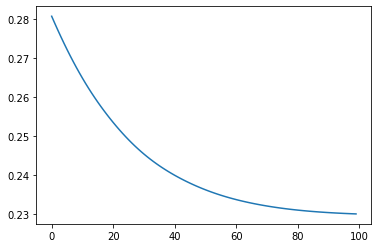

In [9]:
plt.plot(range(0,100), losses)
plt.show()